<h5> Problem set 2 </h5>
50 points total <br> Due April 24th 

The goal of this problem set is to develop a simple model to capture the dynamics of a virus infecting an algal host. You will need to submit a sinlge .py script with your solutions. 

<ins>Question 1</ins> (worth 10 points in total)

The data we are going to use is from a 2005 paper by Baudoux and Brussaard ('Characterization of different viruses infecting the marine harmful algal bloom species Phaeocystis globosa'), which I uploaded to Canvas.

First, let's graph the data. We can first read in the data, e.g.

In [3]:
import numpy as np
import pandas as pd
import pylab as pl

control_df = pd.read_csv('../data/phaeocystis_control.csv')
print(control_df)

        time     host
0   0.000000  1630000
1   0.208333  1710000
2   0.333333  1750000
3   0.500000  1770000
4   0.666667  1960000
5   0.833333  1480000
6   1.020833  2150000
7   1.166667  1900000
8   1.333333  2000000
9   1.541667  2670000
10  1.708333  2900000
11  1.875000  2450000
12  2.125000  2500000
13  2.625000  3660000


Now let's plot the data

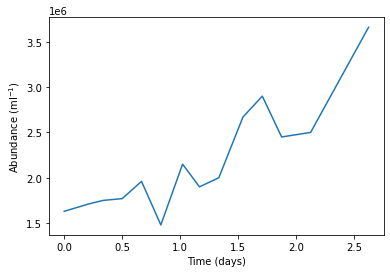

In [5]:
f,ax = pl.subplots()
ax.plot(control_df.time,control_df.host)

ax.set_xlabel('Time (days)')
ax.set_ylabel('Abundance (ml$^{-1}$)')

pl.show()

The 'treatment' data are stored in the file '../data/phaeocystis_PgV_one_step.csv'. Load these data and plot them, following similar formatting as above, but separating out the 'hosts' and 'viruses' onto different axes. 

<ins>Question 2 </ins> (worth 20 points in total)

Now that we have the data loaded, let's test out a model. Let a 'susceptible' host population be $S$ (ml$^{-1}$), a population of infected cells be $I$ (ml$^{-1}$) and a population of viruses be $V$ (ml$^{-1}$). A model describing the dynamics of these three populations may then be written:

\begin{align}
\frac{dS}{dt} &= \mu S - \phi S V \\
\frac{dI}{dt} &= \phi S V - \lambda I \\
\frac{dV}{dt} &= \beta \lambda I
\end{align}

where $\mu$ is the host growth rate (day$^{-1}$), $\phi$ is an infection rate (ml day$^{-1}$), $\lambda$ is a rate of lysis (day$^{-1}$) and $\beta$ is a burst size (unitless). Let's assume that at time $t=0$ we have the initial conditions:

\begin{align}
S(0) &= 1420000 \\
I(0) &= 0 \\
V(0) &= 25000000
\end{align}

Note that these were chosen to match the starting densitities in the '../data/phaeocystis_PgV_one_step.csv' file. 

Using Euler integration, solve the model to predict the dynamics of $S$, $I$ and $V$. Use the following code as a starting point:

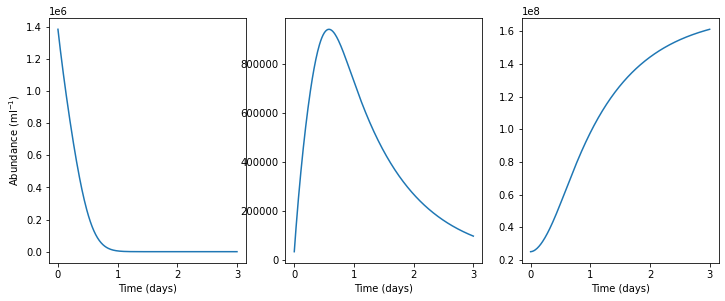

In [11]:
S,I,V = 1420000,0,25000000 # initial conditions
mu,phi,lamb,beta = 0.1,1e-7,1.0,100 # parameter values

# time domain
tmin,tmax = 0,3
delta = 0.01
nsteps = (tmax-tmin)/delta
times = np.linspace(tmin,tmax,int(nsteps))

# figures
f,ax = pl.subplots(1,3,figsize=[12,4.5]) # set up axes

# arrays to store solutions in
Ss,Is,Vs = np.r_[[]],np.r_[[]],np.r_[[]] 

# now do Euler integration
for t in times:
    dSdt = mu*S - phi*S*V
    dIdt = phi*S*V - lamb*I
    dVdt = beta*I
    S = S + delta*dSdt
    I = I + delta*dIdt
    V = V + delta*dVdt
    Ss = np.append(Ss,S)
    Is = np.append(Is,I)
    Vs = np.append(Vs,V)
    
# display figures
ax[0].plot(times,Ss)
ax[1].plot(times,Is)
ax[2].plot(times,Vs)

# labels
ax[0].set_ylabel('Abundance (ml$^{-1}$)')
ax[0].set_xlabel('Time (days)')
ax[1].set_xlabel('Time (days)')
ax[2].set_xlabel('Time (days)')
pl.show()

<ins>Question 3</ins> (worth 20 points in total) 

Now compare the model solutions with the experimental data. To do this, you can take the solutions for S and I and simply add them together. In Python code this would simply be: Hs = Ss + Is (where 'H' stands for the total hosts, aggregating susceptible and infected). Plot the model solutions on the same graph as the appropriate data (i.e. with Hs compared with 'hosts
, along with the experimental data from question 2. How does it look? Can you improve the model-data fit by choosing different values for the parameters $\mu$, $\phi$, $\lambda$ and $\beta$? Try out a few different values of these parameters to see if you can improve the fit. Report your findings.